# Lab 5 # Ensemble method and Grid search with Cross_validation .

Group members:
- Name (ID): Sai Sahas Elluru (0753808)
- Name (ID): Hari Sai Palem (0747511)
- Name (ID): Siddharth Singh (0756590)

In this lab, the main objective is to understand the parameters of the Decision Tree model and how to evaluate the model based on the different metrics we studied.

By the end of this lab you should have:

- a good understanding of ensemble of Decision Trees.
- learn and implement how grid search and cross validation are combined in the GridsearchCV class.

### Grading

This lab will be graded as follows:
- 50% for comments/text
    - Half of the lab grade will come from an assessment of the comments/text included in your Jupyter notebook submission
        - The comments/text should explain clearly what you are doing and why it's necessary to achieve the objective
        - You should think of the comments/text as if you were creating a tutorial/blog to guide someone through your work 
- 50% for code
    - Half of the lab grade will come from an assessment of your code
        - The code in the notebook should use base python, NumPy, Pandas, sklearn, and/or matplotlib. 
        - All code cells should run error free
        - The code does not have to be optimized or pretty: it needs to be functional for the specific task

### Submition

This is a **group submission** lab, so work in the same groups that you are already assigned to.

You should submit the following:
- a well-commented Jupyter notebook
- the original dataset used as a .csv file

### Instructions
Use the same dataset that you used for the marked lab #4. If your dataset is bigger than 1,000 rows, you can truncate the dataset to only 1,000 rows to avoid CPU performance issues and explain how you performed the cut.

Make sure to explain your steps, results and observations at each step.

Use the last 3 digits from any of your group team members user ID as a random state variable where applicable and do implement the following:

1- Using nested loops and split ratio 65_training, 15_validation, and 20_testing; while using only the training and validation sets build a random forest with number of trees between 5 and 12 with a step of 2 using the default parameters and implement a cross-validation with 4 folds. Ensure to print out the validation score for each fold and find the one that provides the best accuracy.

Once you have identified the one with the best accuracy above, evaulate the accuracy of this model using the testing_set.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

import required libraries

In [88]:
import os
os.chdir('E:\\Clair\\SEM2\\ML\\LAb3')

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'E:\\Clair\\SEM2\\ML\\LAb3'

In [3]:
data = pd.read_csv('baseball.csv')

Using pandas import baseball.csv

In [4]:
data1 = data[0:1000]
data1.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


Trimming the data to 1000 values

In [5]:
data2 = data1[['RS','RA','W','OBP','SLG','BA','G','League','Playoffs']]
data3 = data2.dropna()

In [6]:
dummies = pd.get_dummies(data3.League,drop_first=True)
data4 = pd.concat([data3,dummies],axis=1)
data_final = data4.drop('League',axis=1)
data_final.head()
data_final.isnull().sum()

RS          0
RA          0
W           0
OBP         0
SLG         0
BA          0
G           0
Playoffs    0
NL          0
dtype: int64

Storing the required columns into the variable 'data'

In [7]:
y = data_final.Playoffs.values
x = data_final.drop('Playoffs',axis=1)

Store the feature variables in x and target variable in y

In [8]:
X_train, test_df, y_train, y_test = train_test_split(x, y,test_size=.2, random_state=590)
train_df, val_df, train_target, y_val = train_test_split(X_train,y_train,test_size = .1875, random_state=590)

Now using train test split from sklearn, split the data into training, testing and validating datasets.

In the first statement, we are splitting the data (x, y) into test_df, y_test and X_train, y_train with the test_size = 0.2. Now we have testing datset with 20% of the data.

In the second statement, we are splitting the data (X_train, y_train) into train_df, y_train and val_df, y_val with the test_size = 0.1875. Now we have validation dataset with 15% of the data.

train_df -> training dataset = 65%

test_df -> testing dataset = 20%

val_df -> validation dataset = 15%

In [9]:
print('number of points in train data', train_df.shape[0])
print('number of points in validation data', val_df.shape[0])
print('number of points in test', test_df.shape[0])

number of points in train data 650
number of points in validation data 150
number of points in test 200


Checking the shape each dataset train_df, test_df, and val_df.

Ensemble learning is used to enhance the performance of Machine Learning model. Random Forest comes under bagging technique. In bagging, weak learners are produced parallely in training phase. Performance of model can be increased by parallely training the weak learners on a bootstrap dataset. Dividing the dataset into bootstrapped datasets and running weak learner algorithm on each of the bootstrapped datasets.

In [11]:
from sklearn.ensemble import RandomForestClassifier
for i in [5,7,9,11]:
    clf_RF = RandomForestClassifier(n_estimators = i, random_state = 590)
    scores=cross_val_score(clf_RF,X_train,y_train,cv=4).mean()
    print("cross val score for n_estimator = ", i, "is", scores)
    print()

cross val score for n_estimator =  5 is 0.89625

cross val score for n_estimator =  7 is 0.905

cross val score for n_estimator =  9 is 0.9125000000000001

cross val score for n_estimator =  11 is 0.9125000000000001



Using sklearn ensemble we import Randomforest classifier to create a new model. Random forest also works as decision tree but RF consturcts multiple decision trees by changing the root node. That means each time a tree is built with different root node and decision nodes. Each tree gives the final decision or leaf node. RF chooses the result of majority of the decision trees.
Here n_estimators means number of trees to be built.

Cross validation score is calculated using taget, feature, model and number of folds. Generally, cross validation shuffles the data randomly and split the data into given number of folds. Using the data provided it splits,train, and evaluates for each fold.

Now we are using for loop to calculate which estimator gives the best cross val score and model. And the classifier is random forest classifier. Calculating cross val score which is imported from sklearn. The parameters are randomforest classifier and validation dataset and 4 folds. Calculating the mean of each fold for each estimators. 

Randomforest classifier model gives best cross validation score with the estimator = 9 which is 0.913.

In [119]:
#print('accuracy for 5,7,9,11 trees are',acc[0:])

In [120]:
model_RF = RandomForestClassifier(n_estimators = 9)
model_RF.fit(X_train,y_train)
y_pred_test_set = model_RF.predict(test_df)
accuracy_score(y_test,y_pred_test_set)

0.885

Using the best estimator which we got by calculating the cross validation score, we build the random forest model and fit it using training data. Then predict the values for testing data and calculate the prediction accuracy or testing accuracy.

Testing accuracy for randomforest clssifier with 9 trees is 0.84

2- Explain the difference between the best accuracy obtained from the model and that obtained using the testing_set above.

Compare your results in Step#1 above to the best results you had in lab #4, explain the differencies if any.

Best accuracy from the cross validation score is 0.906 by building random forest classifier with 9 trees. And testing accuracy of random forest classifier with 9 trees is 0.84. There is a huge difference between these 2 accuracies.
Generally to estimate the performance of the model we have to consider the test accuracy. The accuracy for validation set could be more because of overfitting. And moreover the model behaves differently with the unseen data (test) than the data which is used to train the model. This can be the reason for less testing accuracy.

Tesiting accuracy for decision tree model with same data is 0.9 and for RF model is 0.84. Decision tree builts a single tree with respect to decrease the entropy in the dataset. But a single decision tree is often a weak learner. We need multiple trees for better prediction. These multiple trees method is Random forest classifier method. Though the testing accuracy of random forest is less than testing accuracy of decision tree, the prediction for random forest is better. And the other reason would be data used for training the data in the case of decision tree is 80% and the training data used in random forest is 65%.


3- Similar to question 1 in lab #4 but instead of using nested loops use the GridSearchCV class with the model that you obtained in step 1 above, try to find the best combined parameters that provide the best accuracy for the testing dataset from:
- max_depth values between 3 and 5 with a step of 1.
- max_leaf_nodes values between 10 and 20 with a step of 5.
- min_samples_leaf with values between 10 and 25 with a step of 5.

Plot your results for the testing and training accuracies for each step.


Compare your result with what you obtained in lab #4.

In [121]:
params= {'max_depth': (3,4,5),
        'max_leaf_nodes':(10,15,20),
        'min_samples_leaf':(10,15,20,25)}

max_depth, max_leaf_nodes and min_samples_leaf are the parameters which we are tuning. Params is the variable for the grid search parameter param_grid.

In [18]:
from sklearn.model_selection import GridSearchCV
dt = RandomForestClassifier()

In [123]:
grid_search_RF = GridSearchCV(RandomForestClassifier(n_estimators=9,random_state=590), param_grid = params,return_train_score=True,scoring = 'accuracy', n_jobs = -1)
grid_search_RF = grid_search_RF.fit(X_train, y_train)
accuracy = grid_search_RF.best_score_
print("Test score is "+str(grid_search_RF.score(test_df,y_test)))
print("Best parameters:"+str(grid_search_RF.best_params_))
print("Best grid search score:"+str(accuracy))
print("Best estimator:"+str(grid_search_RF.best_estimator_))

Test score is 0.87
Best parameters:{'max_depth': 5, 'max_leaf_nodes': 10, 'min_samples_leaf': 25}
Best grid search score:0.925
Best estimator:RandomForestClassifier(max_depth=5, max_leaf_nodes=10, min_samples_leaf=25,
                       n_estimators=9, random_state=590)


Here we using grid search cv which is an library fo r hyperparameter tuning.
Each parameter of decission tree classifier has significance. Max depth represents how many layers does a tree need to spread. If max_depth is higher then there is a high chance of overfitting vice versa if it is lower then there is a chance that the tree not recognize the importance of features. Over here we are comparing max_depth of 3 and 4 we take 3 as our ideal since it lead to high accuracy.

max_leaf_nodes determines the tree with max_leaf_nodes in best first fashion. Best nodes are defined as relative reduction in impurity. So we will go for higher max_leaf_nodes. By that condition for max_leaf_node 10 the accuracy is higher.

min_sample_leaf: leaf node is a node without any children(without any further splits). This value used to stop split of leafs to certain samples. This reduces overfitting and complexity. By this condition for min_sample_leaf 25 the accuracy is higher.

So for the combination max_depth:3, max_leaf_nodes:15, and min_sample_leaf:10 the testing accuracy is 0.925.


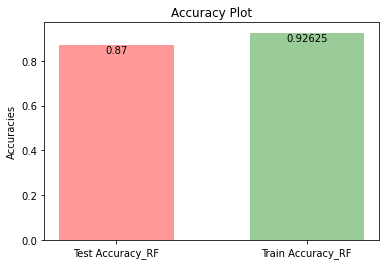

In [124]:
            dt_RF = RandomForestClassifier(n_estimators = 9, max_depth = 5, max_leaf_nodes = 10, min_samples_leaf = 25, random_state = 590)
            dt_RF.fit(X_train, y_train)  #fit the model
            y_pred = dt_RF.predict(test_df)
            testaccuracy_RF = accuracy_score(y_test,y_pred)  
            
            y_pred2 = dt_RF.predict(X_train)
            trainaccuracy_RF = accuracy_score(y_train,y_pred2)
            
            objects_RF = ('Test Accuracy_RF', 'Train Accuracy_RF')
            y = np.arange(len(objects_RF))
            Accuracy_RF = [testaccuracy_RF, trainaccuracy_RF]
            plt.bar(y, Accuracy_RF, width = 0.6, align = 'center', alpha=0.4, color = ['red', 'green'])
            for index, value in enumerate(Accuracy_RF): 
                plt.text(index, value, str(value), horizontalalignment='center', verticalalignment='top', alpha = 1.0)
            plt.xticks(y, objects_RF)
            plt.ylabel('Accuracies')
            plt.title('Accuracy Plot')
            plt.show()

Using the model with best parameters, we are predicting the values for test_df and finding the predicting accuracy. And also predicting the values for train_df and finding the predicting accuracy for training set. And also we plotted the training and testing accuracies. Obviously, the training accuracy will be higher because the model has already seen the training data which we used to fit the model with. To validate the model performance we need to consider the prediction accuracy of test data which is .

The prediction accuracy of test data for decision tree model with the parameters max_depth:3, max_leaf_nodes:15, and min_sample_leaf:10 is 0.9.

The prediction accuracy of test data for Random forest classifier model with the parameters max_depth:5, max_leaf_nodes:10, and min_sample_leaf:25 is 0.87.
Accuarcy has been increased after hyper parameter tuning. But it is still less than the accuracy of decision tree wiht a difference of 0.03. Ensemble methods are basically used to compute large datasets and the dataset on which we computing the model has 1000 rows only. So, there is a chance of underfitting. Decision tree classifier is weak learner because of only one tree. And there is a high cahance of overfitting and variance.

4- Explain how the GridSearchCV works.

We will be doing hyperparameter tuning using gridsearch cv which is imported form sklearn model selection library. It basically a long nested for-loop which is simplified into few lines of code. Rather than going for nested for-loop to get which combination of hyperparameter values gives best accuracy values, we input all these into param_grid, parameter of the grid searchcv. By specifying the model name in estimator. It calculates the specified scoring parameter using it. It gives all the best parameters which gives best accuracy.

5- Repeat questions 1 to 3 above using the XGBoost ensembel of your choice inplace of the random forest and compare your results. 

In [13]:
from xgboost import XGBClassifier
for i in [5,7,9,11]:
    clf_XG = XGBClassifier(n_estimators = i, random_state=590)
    scores=cross_val_score(clf_XG,X_train,y_train,cv=4).mean()
    print("cross val score for n_estimator = ", i, "is", scores)
    print()

cross val score for n_estimator =  5 is 0.91625

cross val score for n_estimator =  7 is 0.9175

cross val score for n_estimator =  9 is 0.91875

cross val score for n_estimator =  11 is 0.9175



We are importing XGBClassifier from the xgboost library. It is called Extreme Gradient Boosting, and a ensembe method which comes under boosting(sequential) technique. In boosting, trees are built one after the other and performance of model is improved by assigning weightage to the previously incorrect classified samples.

In Gradient Boosting, present base learner is  always more effective than the previous one and the base learners are generated in that way. Overall model performance improves sequentially with each iteration.

XGBoost is an advance level of gradient boosting. It mainly focuses on computational speed and efficiency. This method optimizes the loss function of previos learner to increase the model performance.

Using same techniques as in step-1, we are calculating cross validation score for training and validation datasets with 4 folds. By this we can determine number trees to be generated to procure the best accuracy from the model.

For n_estimator = 9 the accuracy is 0.919

In [14]:
#print('accuracy for 5,7,9,11 trees are',acc[0:])

In [21]:
model_XG = XGBClassifier(n_estimators= 9)
model_XG.fit(X_train,y_train)
y_pred_test_set = model_XG.predict(test_df)
accuracy_score(y_test,y_pred_test_set)

0.875

We use the same estimator and build the model to find the predicting accuracy of test data. Accuracy for training and validating data is 0.919 and for the test data is 0.875. It can be because the model has not seen the test data and may behave differently with the test data.

In [16]:
params= {'max_depth': (3,4,5),
        'max_leaf_nodes':(10,15,20),
        'min_samples_leaf':(10,15,20,25)}

In [19]:
grid_search_XG = GridSearchCV(XGBClassifier(n_estimators = 11, random_state = 590), param_grid = params,return_train_score=True, n_jobs = -1, cv=3)
grid_search_XG = grid_search_XG.fit(X_train, y_train)
print("Test score is "+str(grid_search_XG.score(test_df,y_test)))
print("Best parameters:"+str(grid_search_XG.best_params_))
print("Best grid search score:"+str(grid_search_XG.best_score_))
print("Best estimator:"+str(grid_search_XG.best_estimator_))

Test score is 0.895
Best parameters:{'max_depth': 4, 'max_leaf_nodes': 10, 'min_samples_leaf': 10}
Best grid search score:0.9137121830794214
Best estimator:XGBClassifier(max_depth=4, max_leaf_nodes=10, min_samples_leaf=10,
              n_estimators=11, random_state=590)


Using the best model from the previous step, we are performing hyperparameter tuning of the model using gridsearchcv method.
So for the combination max_depth:4, max_leaf_nodes:10, and min_sample_leaf:10 the accuracy is 0.914. And the accuracy has been improved after the parameter tuning.



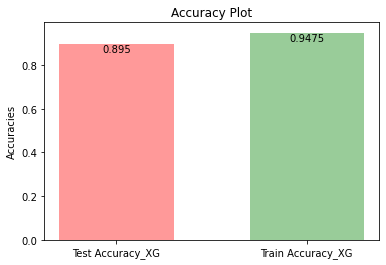

In [20]:
            xgb = XGBClassifier(n_estimators = 11, max_depth = 4, max_leaf_nodes = 10, min_samples_leaf = 10, random_state = 590)
            xgb.fit(X_train, y_train)  #fit the model
            y_pred = xgb.predict(test_df)
            testaccuracy_XG = accuracy_score(y_test,y_pred)  
            
            y_pred2 = xgb.predict(X_train)
            trainaccuracy_XG = accuracy_score(y_train,y_pred2)
            
            objects_XG = ('Test Accuracy_XG', 'Train Accuracy_XG')
            y = np.arange(len(objects_XG))
            Accuracy_XG = [testaccuracy_XG, trainaccuracy_XG]
            plt.bar(y, Accuracy_XG, width = 0.6, align = 'center', alpha=0.4, color = ['red', 'green'])
            for index, value in enumerate(Accuracy_XG): 
                plt.text(index, value, str(value), horizontalalignment='center', verticalalignment='top', alpha = 1.0)
            plt.xticks(y, objects_XG)
            plt.ylabel('Accuracies')
            plt.title('Accuracy Plot')
            plt.show()

Finally, we are using best parameters from the gridsearch cv to evaluate the predicting accuracy of training data and predicting accuracy for the test data.

The prediction accuracy of test data for decision tree model with the parameters max_depth:3, max_leaf_nodes:15, and min_sample_leaf:10 is 0.9.

The prediction accuracy of test data for XGBosst classifier model with the parameters max_depth:4, max_leaf_nodes:10, and min_sample_leaf:10 is 0.895. There is a slight decrease in the performance but there can be much better accuracy if the model is trained with much more data. Since, these ensemble methods are used to compute large datasets. There can be an issue of underfitting.